<a href="https://colab.research.google.com/github/prashant-gulati/colab/blob/main/NNFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
# Connect Colab and Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
data = pd.read_csv('/content/drive/MyDrive/ai-ml/digit-recognizer/train.csv')

In [19]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [9]:
print(m,n)

42000 785


In [10]:
train_data = data[0:int(0.8*m), :]
val_data = data[int(0.8*m):m, :]

X_train = train_data[:, 1:].T
X_train = X_train / 255.0
Y_train = train_data[:, 0]

X_val = val_data[:, 1:].T
X_val = X_val / 255.0
Y_val = val_data[:, 0]

In [20]:
print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)

(784, 8400)
(8400,)
(784, 33600)
(33600,)


In [12]:
def initialize_parameters():
  W1 = np.random.rand(10, 784) - 0.5
  B1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  B2 = np.random.rand(10, 1) - 0.5
  return W1, B1, W2, B2

def ReLU(X):
  return np.maximum(X, 0)

def softmax_calculator(Z):
  return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(W1, B1, W2, B2, X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax_calculator(Z2)
  return Z1, A1, Z2, A2

def one_hot_converter(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y.T

def backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y):
  one_hot_Y = one_hot_converter(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  dB2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
  dW1 = 1 / m * dZ1.dot(X.T)
  dB1 = 1 / m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2

def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate):
  W1 = W1 - learning_rate * dW1
  B1 = B1 - learning_rate * dB1
  W2 = W2 - learning_rate * dW2
  B2 = B2 - learning_rate * dB2
  return W1, B1, W2, B2

def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, B1, W2, B2 = initialize_parameters()

  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X)
    dW1, dB1, dW2, dB2 = backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y)
    W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)

    if (i%20)==0:
      print("Iteration number: ", i)
      print("Accuracy = ", get_accuracy(get_predictions(A2), Y))
  return W1, B1, W2, B2

In [13]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.1, 1000)

Iteration number:  0
Accuracy =  0.12613095238095237
Iteration number:  20
Accuracy =  0.21589285714285714
Iteration number:  40
Accuracy =  0.2892857142857143
Iteration number:  60
Accuracy =  0.3827380952380952
Iteration number:  80
Accuracy =  0.49607142857142855
Iteration number:  100
Accuracy =  0.5727678571428572
Iteration number:  120
Accuracy =  0.6264880952380952
Iteration number:  140
Accuracy =  0.6642559523809524
Iteration number:  160
Accuracy =  0.6942857142857143
Iteration number:  180
Accuracy =  0.7184226190476191
Iteration number:  200
Accuracy =  0.7380059523809523
Iteration number:  220
Accuracy =  0.755327380952381
Iteration number:  240
Accuracy =  0.7701190476190476
Iteration number:  260
Accuracy =  0.7811607142857143
Iteration number:  280
Accuracy =  0.7904464285714285
Iteration number:  300
Accuracy =  0.7988988095238095
Iteration number:  320
Accuracy =  0.8060119047619048
Iteration number:  340
Accuracy =  0.8124404761904762
Iteration number:  360
Accuracy 

Predicted label:  [6]
Actual label:  4


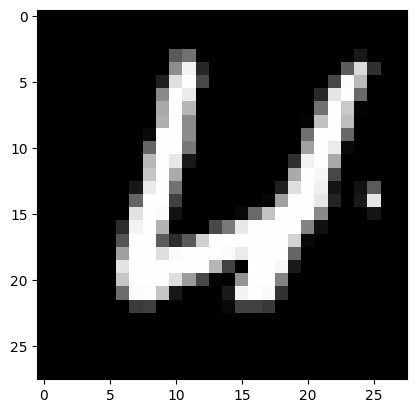

In [14]:
val_index = 560
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val[:, val_index, None])
print("Predicted label: ", get_predictions(A2val))
print("Actual label: ", Y_val[val_index])

image_array = X_val[:,val_index].reshape(28,28)
plt.imshow(image_array, cmap='gray')
plt.show()

In [15]:
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val)
val_acc = get_accuracy(get_predictions(A2val), Y_val)
print("Validation accuracy = ", val_acc)

Validation accuracy =  0.8752380952380953
